# Canaries
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [1]:
!./get_logs.sh 172.19.7.190 2000000 canary
!./get_logs.sh 172.19.7.241 2000000 silver
!./parse_logs.sh canary
!./parse_logs.sh silver
!ls ../data/

canary.csv  canary.log	silver.csv  silver.log


In [2]:
import numpy as np
import os
from stats_util import Type, get_serie
import math

path = os.getcwd()
path 
canary_ds = np.loadtxt(path + "/../data/canary.csv", delimiter=",")
canary_ds = np.delete(canary_ds, [1,], axis=1)

silver_ds = np.loadtxt(path + "/../data/silver.csv", delimiter=",")
silver_ds = np.delete(silver_ds, [1,], axis=1)


In [3]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
canary = get_serie(canary_ds, Type.qps_cap, None, None)
silver = get_serie(silver_ds, Type.qps_cap, None, None)

<Figure size 2700x1260 with 0 Axes>

(203.89766847652507, 11.089145656131764, 170.79716079716079, 14.84948867154183)

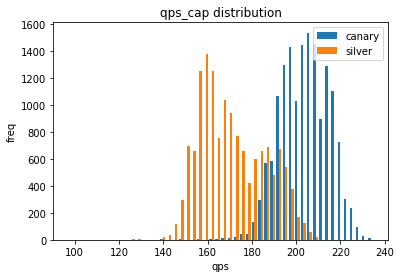

In [4]:
plt.hist([canary, silver], bins=50, label=['canary', 'silver'])
plt.title('qps_cap distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
(canary.mean(),math.sqrt(canary.var()), silver.mean(),math.sqrt(silver.var()))

(182.17151069945703, 7.621510071051541, 164.7474064974065, 8.221959069276735)

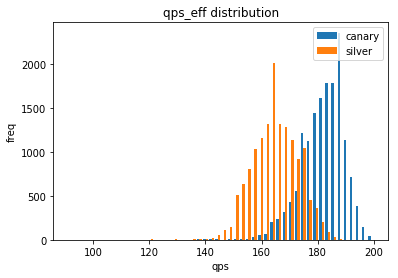

In [6]:
canary = get_serie(canary_ds, Type.qps_eff, None, None)
silver = get_serie(silver_ds, Type.qps_eff, None, None)
plt.hist([canary, silver], bins=50, label=['canary', 'silver'])
plt.title('qps_eff distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
(canary.mean(),math.sqrt(canary.var()), silver.mean(),math.sqrt(silver.var()))

(0.0049081124241456405, 0.0002825545876360097)

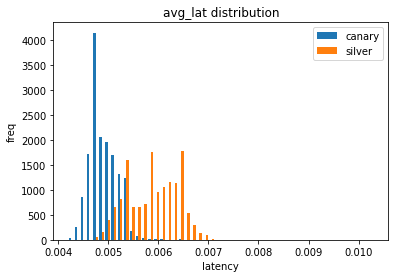

In [7]:
canary = get_serie(canary_ds, Type.avg_lat, None, None)
silver = get_serie(silver_ds, Type.avg_lat, None, None)
plt.hist([canary, silver], bins=50, label=['canary', 'silver'])
plt.title('avg_lat distribution')
plt.xlabel('latency')
plt.ylabel('freq');
plt.legend(loc='upper right')
canary.mean(),math.sqrt(canary.var())

(205.99782816991376, 22.83297486904994, 305.8417280917281, 34.74914388558519)

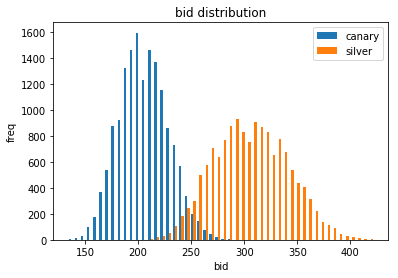

In [9]:
canary = get_serie(canary_ds, Type.bids, None, None)
silver = get_serie(silver_ds, Type.bids, None, None)
plt.hist([canary, silver], bins=50, label=['canary', 'silver'])
plt.title('bid distribution')
plt.xlabel('bid')
plt.ylabel('freq');
plt.legend(loc='upper right')
canary.mean(),math.sqrt(canary.var())
(canary.mean(),math.sqrt(canary.var()), silver.mean(),math.sqrt(silver.var()))

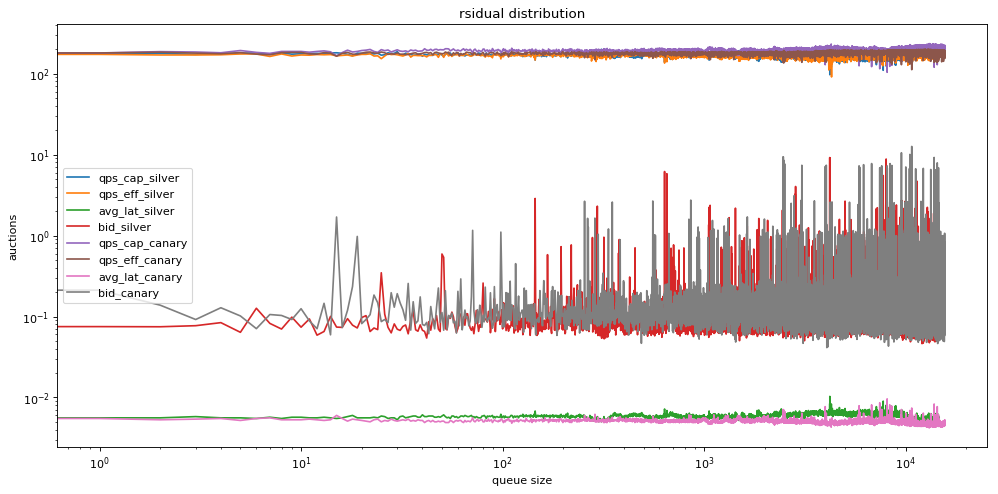

In [10]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(silver_ds[:,1], label="qps_cap_silver")
plt.plot(silver_ds[:, 2], label="qps_eff_silver")
plt.plot(silver_ds[:, 3], label="avg_lat_silver")
plt.plot(silver_ds[:, 4], label="bid_silver")

plt.plot(canary_ds[:,1], label="qps_cap_canary")
plt.plot(canary_ds[:, 2], label="qps_eff_canary")
plt.plot(canary_ds[:, 3], label="avg_lat_canary")
plt.plot(canary_ds[:, 4], label="bid_canary")

#plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('rsidual distribution')
plt.xlabel('queue size')
plt.ylabel('auctions');
plt.legend()
plt.show()